In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
pre_app = pd.read_csv("F:/Data Analysis/home_credit_default_risk/raw/previous_application.csv")

In [3]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pre_app.shape

(1670214, 37)

In [5]:
pre_app.apply(lambda x: x.unique().shape[0]) # 每列的SK_ID_PREV都不一樣

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357960
AMT_APPLICATION                  93885
AMT_CREDIT                       86804
AMT_DOWN_PAYMENT                 29279
AMT_GOODS_PRICE                  93886
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207034
RATE_INTEREST_PRIMARY              149
RATE_INTEREST_PRIVILEGED            26
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      8
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

In [6]:
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [7]:
len(pre_app.columns)

37

In [8]:
pre_app.columns[0]

'SK_ID_PREV'

In [9]:
pre_app.iloc[:,3]

0           1730.430
1          25188.615
2          15060.735
3          47041.335
4          31924.395
             ...    
1670209    14704.290
1670210     6622.020
1670211    11520.855
1670212    18821.520
1670213    16431.300
Name: AMT_ANNUITY, Length: 1670214, dtype: float64

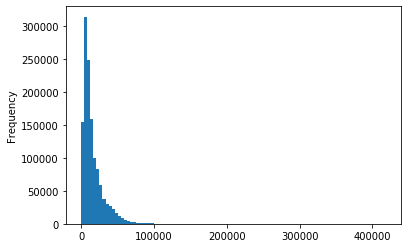

In [10]:
pre_app.iloc[:,3].plot.hist(bins=100)

In [11]:
np.dtype(pre_app.iloc[:,2])

dtype('O')

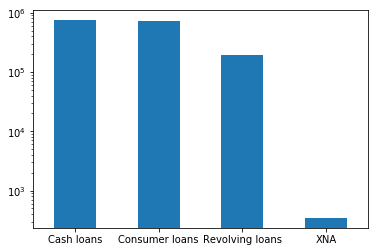

In [12]:
pre_app.iloc[:,2].value_counts().plot(kind='bar',rot=0,logy=True)

<Figure size 720x720 with 0 Axes>

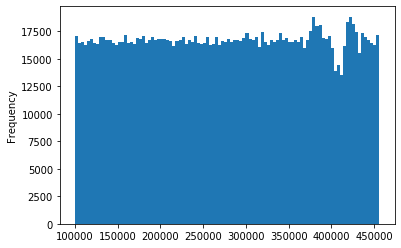

<Figure size 720x720 with 0 Axes>

In [13]:
pre_app.iloc[:,1].plot.hist(bins=100)
plt.figure(figsize=(10,10))

In [14]:
def plot_hist(data):
    for i in range(len(pre_app.columns)):    
        fig,axes = plt.subplots()
#         plt.figure(figsize=(15,10))
        if (np.dtype(data.iloc[:,i]) == 'O'):
            data.iloc[:,i].value_counts().plot(kind='bar',rot=0,logy=True)
        else:
            data.iloc[:,i].plot.hist(bins=100,ax=axes)
        axes.set_title(pre_app.columns[i])

C:\Users\YEN32\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\YEN32\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\YEN32\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inte

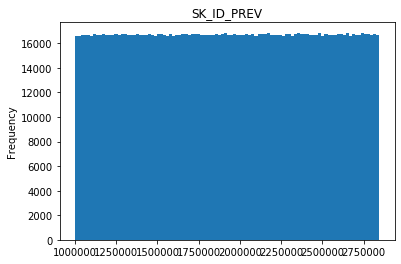

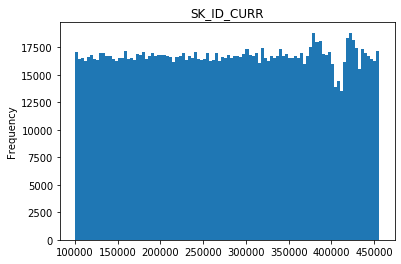

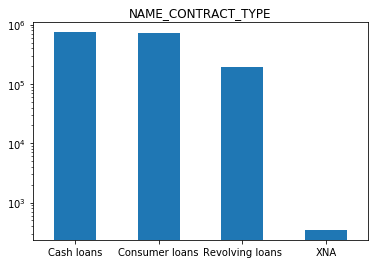

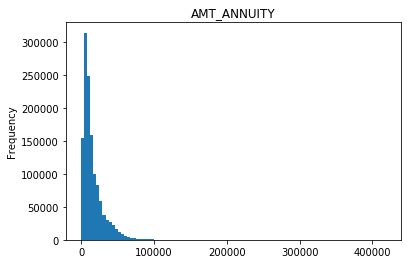

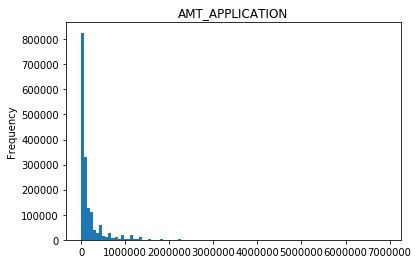

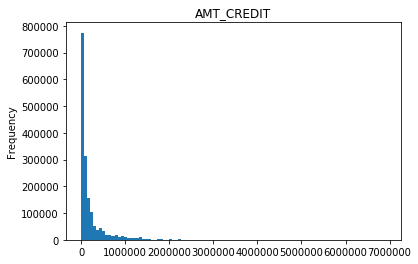

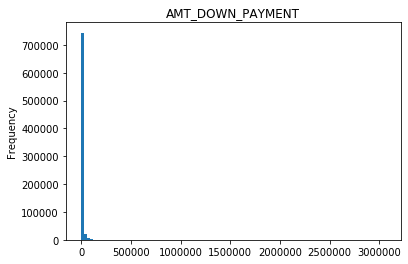

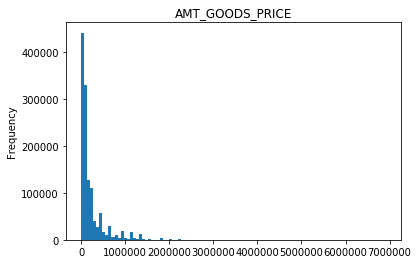

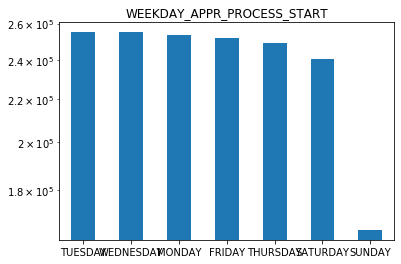

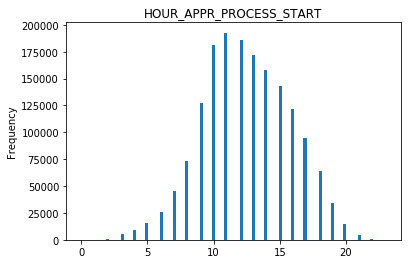

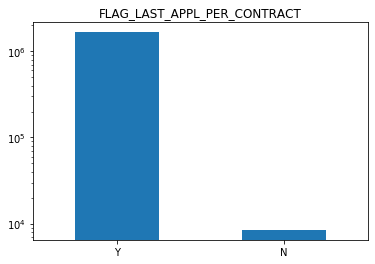

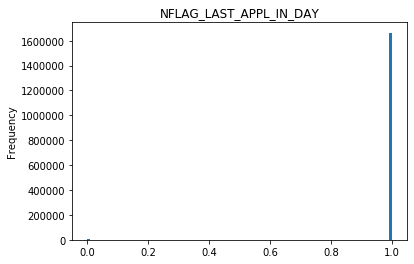

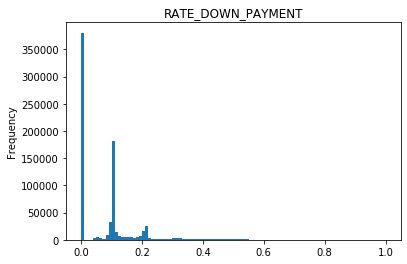

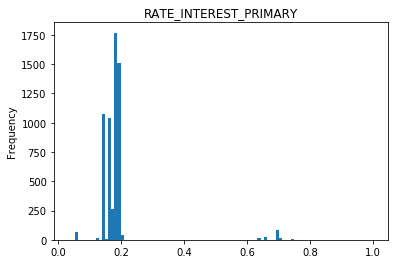

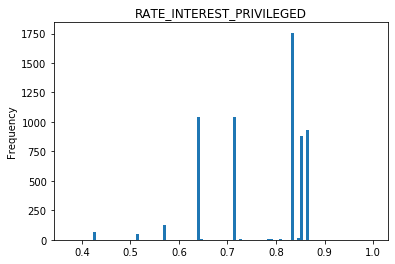

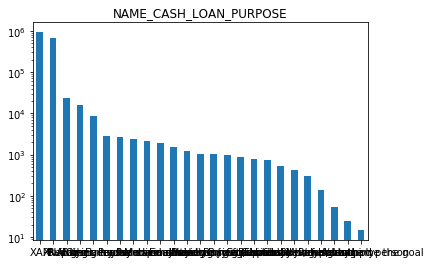

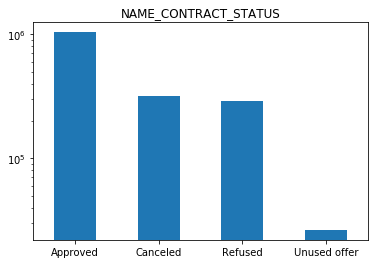

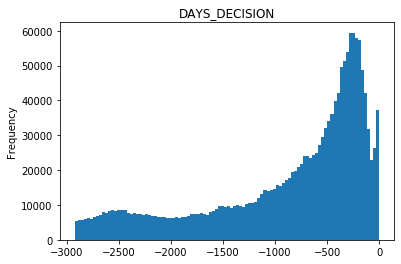

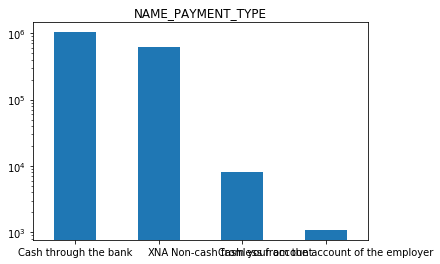

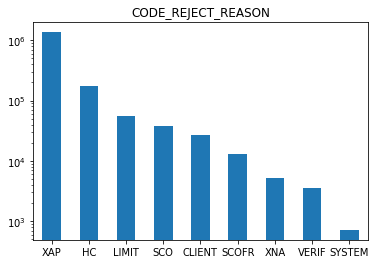

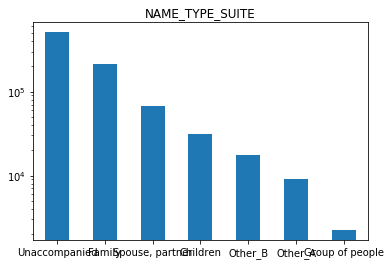

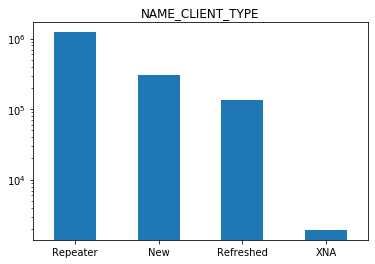

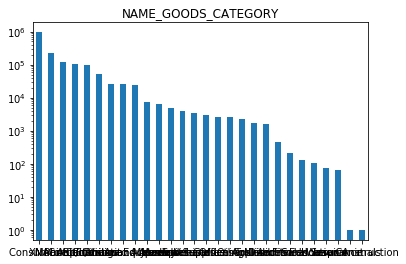

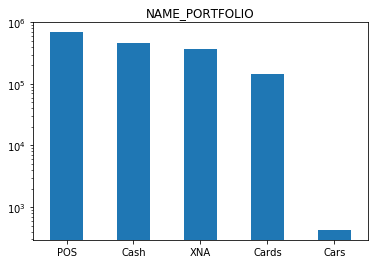

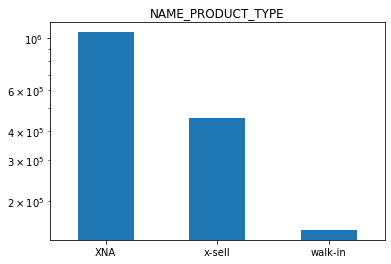

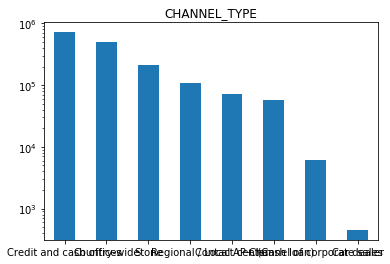

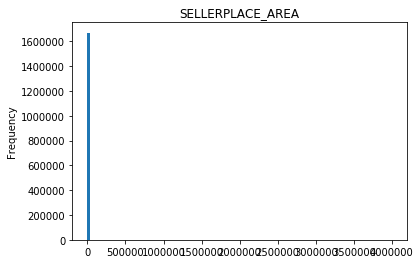

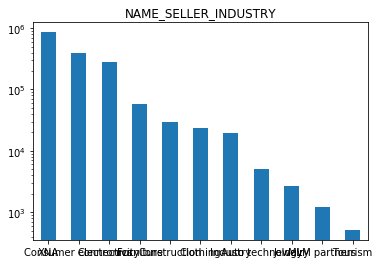

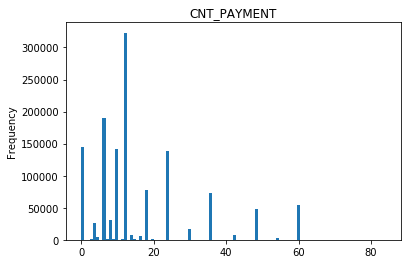

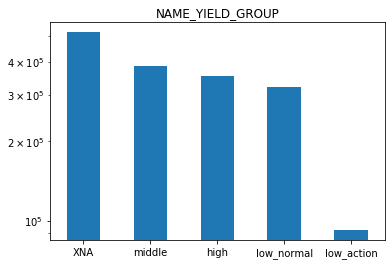

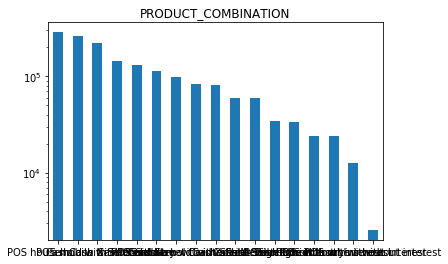

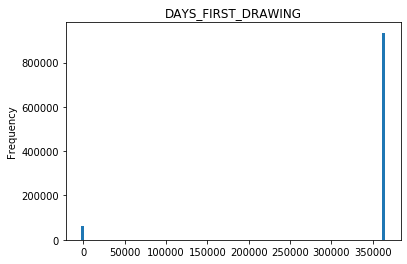

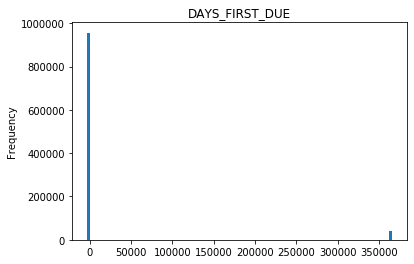

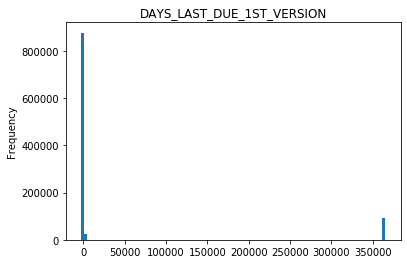

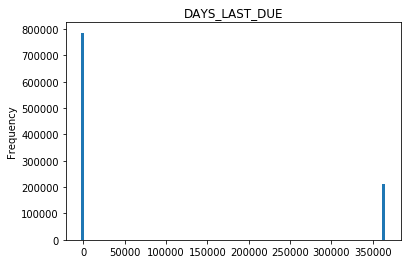

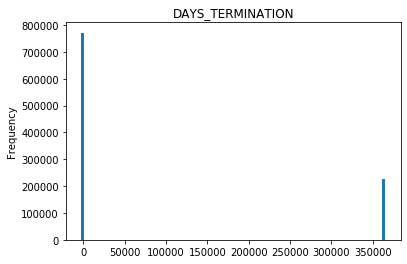

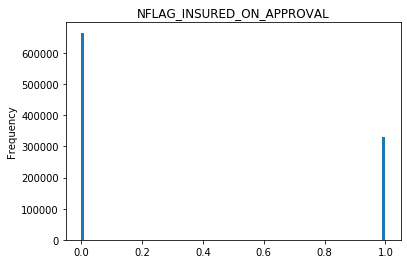

In [15]:
plot_hist(pre_app)

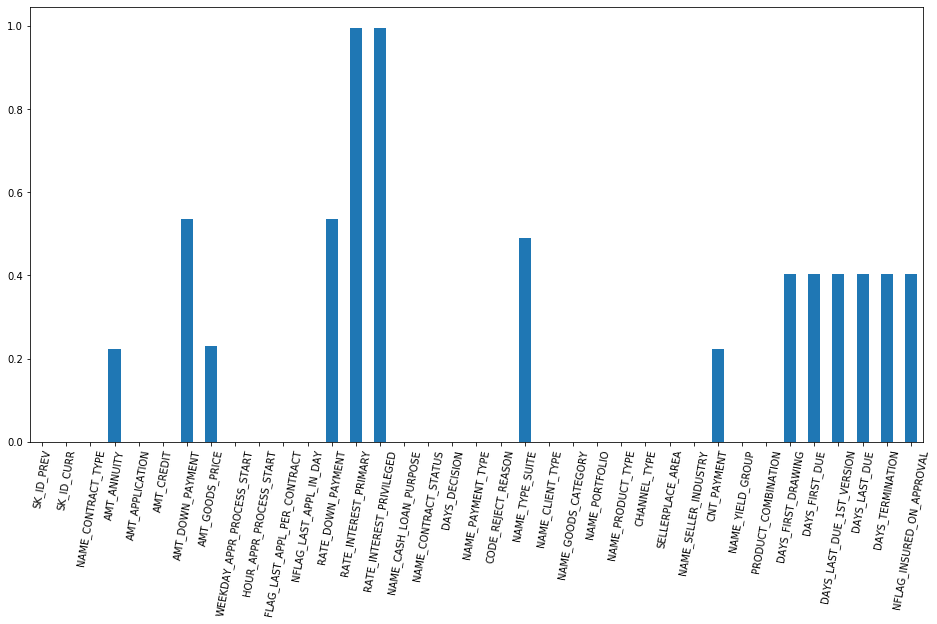

In [16]:
plt.figure(figsize=(16,8))
(pre_app.isna().sum()/pre_app.shape[0]).plot(kind='bar',rot=80)

In [17]:
pre_app.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [18]:
pre_app['CREDIT/APPLICATION'] = pre_app['AMT_CREDIT']/pre_app['AMT_APPLICATION'] # 實際得到貸款除以申請金額
pre_app['CREDIT/APPLICATION'].describe()

count    1.333446e+06
mean              inf
std               NaN
min      0.000000e+00
25%      9.890968e-01
50%      1.000000e+00
75%      1.116161e+00
max               inf
Name: CREDIT/APPLICATION, dtype: float64

In [19]:
pre_app['CREDIT/APPLICATION'].isna().sum()

336768

In [20]:
pre_app['AMT_APPLICATION'].describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

In [21]:
pre_app['CREDIT/APPLICATION'] = np.where(pre_app['AMT_APPLICATION']!=0,pre_app['AMT_CREDIT']/pre_app['AMT_APPLICATION'],np.nan)

In [22]:
pre_app['CREDIT/APPLICATION'].describe()

count    1.277812e+06
mean     1.030234e+00
std      1.513398e-01
min      0.000000e+00
25%      9.883495e-01
50%      1.000000e+00
75%      1.105597e+00
max      2.000000e+01
Name: CREDIT/APPLICATION, dtype: float64

In [23]:
pre_app['CREDIT/APPLICATION'].isna().sum()

392402

In [24]:
#pre_app['CREDIT/APPLICATION'] = pd.to_numeric(pre_app['CREDIT/APPLICATION'])

In [25]:
#pre_app['CREDIT/APPLICATION'].describe()

In [26]:
pre_app.loc[pre_app['CREDIT/APPLICATION'].isna()==True]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CREDIT/APPLICATION
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,9,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670186,1433968,272570,Cash loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,15,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670187,1971628,435554,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,10,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670190,2381880,175920,Cash loans,NaN,0.0,0.0,NaN,NaN,FRIDAY,11,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670192,2101747,339383,Revolving loans,3375.0,0.0,67500.0,NaN,NaN,FRIDAY,18,...,0.0,XNA,Card X-Sell,-474.0,-438.0,365243.0,365243.0,365243.0,0.0,NaN


In [27]:
pre_app.loc[pre_app['AMT_APPLICATION']==0].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CREDIT/APPLICATION
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,9,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN


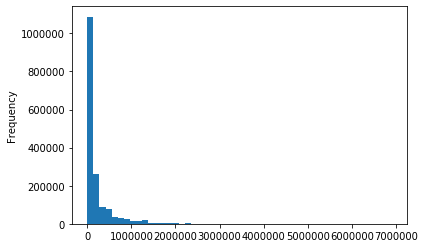

In [28]:
pre_app['AMT_CREDIT'].plot.hist(bins=50)

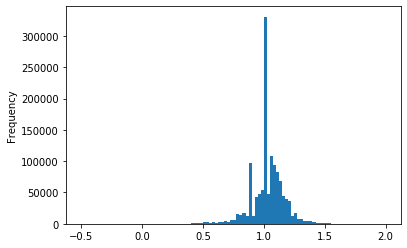

In [29]:
pre_app['CREDIT/APPLICATION'].plot.hist(bins=100,range=(-0.5,2))

In [30]:
pre_app.loc[pre_app['AMT_GOODS_PRICE'].isna() == True] # 看一下AMT_GOODS_PRICE為NA的

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CREDIT/APPLICATION
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,9,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670186,1433968,272570,Cash loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,15,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670187,1971628,435554,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,10,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670190,2381880,175920,Cash loans,NaN,0.0,0.0,NaN,NaN,FRIDAY,11,...,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670192,2101747,339383,Revolving loans,3375.0,0.0,67500.0,NaN,NaN,FRIDAY,18,...,0.0,XNA,Card X-Sell,-474.0,-438.0,365243.0,365243.0,365243.0,0.0,NaN


In [31]:
pre_app['GOODS_PRICE/APPLICATION'] = pre_app['AMT_GOODS_PRICE']/pre_app['AMT_APPLICATION']
pre_app['GOODS_PRICE/APPLICATION'].isna().sum()

392384

In [32]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CREDIT/APPLICATION,GOODS_PRICE/APPLICATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,1.00000,1.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,1.11880,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,1.21284,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,1.04620,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,1.19720,1.0


In [33]:
pre_app['GOODS_PRICE/APPLICATION'].describe()

count    1.277830e+06
mean              inf
std               NaN
min      1.111111e-01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max               inf
Name: GOODS_PRICE/APPLICATION, dtype: float64

In [34]:
pre_app['GOODS_PRICE/APPLICATION'] = np.where(pre_app['AMT_APPLICATION']!=0,pre_app['GOODS_PRICE/APPLICATION'],np.nan)

In [35]:
pre_app['GOODS_PRICE/APPLICATION'].isna().sum()

392402

In [36]:
np.dtype(pre_app['GOODS_PRICE/APPLICATION'])

dtype('float64')

In [37]:
pre_app['GOODS_PRICE/APPLICATION'].describe()

count    1.277812e+06
mean     1.000235e+00
std      3.951346e-02
min      1.111111e-01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.700000e+01
Name: GOODS_PRICE/APPLICATION, dtype: float64

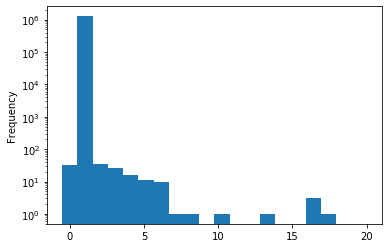

In [38]:
pre_app['GOODS_PRICE/APPLICATION'].plot.hist(bins=20,range=(-0.5,20),log=True)

In [39]:
#(pre_app['GOODS_PRICE/APPLICATION'] == 1).sum()

In [40]:
#len(pre_app['GOODS_PRICE/APPLICATION'])-pre_app['GOODS_PRICE/APPLICATION'].isna().sum()

In [41]:
pre_app.loc[(pre_app['GOODS_PRICE/APPLICATION']!=1) & (pre_app['GOODS_PRICE/APPLICATION'].isna()==False)]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CREDIT/APPLICATION,GOODS_PRICE/APPLICATION
9631,1344307,382786,Revolving loans,16875.0,202500.0,337500.0,NaN,337500.0,THURSDAY,9,...,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,1.666667
11863,2507082,114828,Revolving loans,6750.0,135000.0,135000.0,NaN,270000.0,SATURDAY,17,...,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000
12514,1069798,352773,Revolving loans,29250.0,180000.0,90000.0,NaN,585000.0,MONDAY,20,...,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,3.250000
18542,1888586,386496,Revolving loans,40500.0,247500.0,810000.0,NaN,900000.0,TUESDAY,9,...,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,3.272727,3.636364
27577,2292991,280087,Revolving loans,31500.0,382500.0,630000.0,NaN,135000.0,SATURDAY,13,...,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,1.647059,0.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600632,1408589,158093,Revolving loans,36000.0,270000.0,720000.0,NaN,720000.0,THURSDAY,10,...,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,2.666667,2.666667
1604287,1876155,453970,Revolving loans,9000.0,45000.0,180000.0,NaN,180000.0,MONDAY,15,...,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000
1622030,2576604,333163,Revolving loans,16875.0,427500.0,337500.0,NaN,337500.0,FRIDAY,14,...,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,0.789474,0.789474
1624375,1731649,422759,Revolving loans,33750.0,225000.0,900000.0,NaN,675000.0,SATURDAY,11,...,XNA,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000


In [42]:
pre_app['Down_Payment%'] = pre_app['AMT_DOWN_PAYMENT']/pre_app['AMT_CREDIT'] # 頭期款佔貸款金額的比例
pre_app['Down_Payment%'].isna().sum()

895844

In [43]:
pre_app['Down_Payment%'].describe()

count    774370.000000
mean          0.096739
std           0.180674
min          -0.000014
25%           0.000000
50%           0.049741
75%           0.111111
max          11.224490
Name: Down_Payment%, dtype: float64

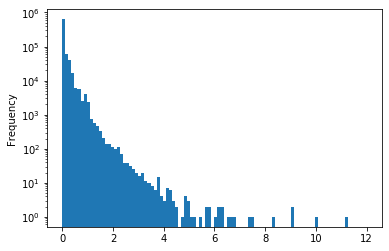

In [44]:
pre_app['Down_Payment%'].plot.hist(bins=100,range=(0,12),log=True) # 高於1不合理

In [45]:
pre_app.loc[pre_app['Down_Payment%'] > 1].head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CREDIT/APPLICATION,GOODS_PRICE/APPLICATION,Down_Payment%
183,2526335,240822,Consumer loans,6767.325,91755.0,33718.5,59625.0,91755.0,SATURDAY,10,...,POS household with interest,365243.0,-2730.0,-2580.0,-2580.0,-2557.0,1.0,0.367484,1.0,1.768317
738,1879926,139705,Consumer loans,6656.310,80995.5,35995.5,45000.0,80995.5,SATURDAY,15,...,POS household with interest,365243.0,-649.0,-499.0,-649.0,-644.0,0.0,0.444414,1.0,1.250156
803,1537143,411319,Consumer loans,5243.355,56655.0,26401.5,31500.0,56655.0,TUESDAY,11,...,POS household with interest,365243.0,-2486.0,-2336.0,-2396.0,-2372.0,1.0,0.466005,1.0,1.193114
1408,1800536,284442,Consumer loans,27814.185,384709.5,192352.5,192357.0,384709.5,WEDNESDAY,17,...,POS industry with interest,365243.0,-2797.0,-2557.0,-2557.0,-2548.0,0.0,0.499994,1.0,1.000023
1664,2716695,214765,Consumer loans,4412.790,44487.0,21987.0,22500.0,44487.0,SATURDAY,8,...,POS mobile with interest,365243.0,-2498.0,-2348.0,-2348.0,-2343.0,0.0,0.494234,1.0,1.023332
2030,1447018,264503,Consumer loans,2194.155,72270.0,18315.0,55350.0,72270.0,WEDNESDAY,11,...,POS household with interest,365243.0,-1846.0,-1576.0,-1696.0,-1692.0,0.0,0.253425,1.0,3.022113
2823,2155630,238691,Consumer loans,6307.830,70380.0,32998.5,42228.0,70380.0,SUNDAY,8,...,POS household with interest,365243.0,-1684.0,-1534.0,-1564.0,-1562.0,0.0,0.468862,1.0,1.279695
2906,2662798,428848,Consumer loans,6450.705,76230.0,32778.0,45000.0,76230.0,TUESDAY,19,...,POS mobile with interest,365243.0,-1486.0,-1336.0,-1336.0,-1332.0,0.0,0.429988,1.0,1.372872
3233,1983664,129928,Consumer loans,4603.545,80955.0,39514.5,45000.0,80955.0,MONDAY,18,...,POS household with interest,365243.0,-1916.0,-1586.0,-1796.0,-1794.0,0.0,0.488105,1.0,1.138822
3480,1671823,381938,Consumer loans,3411.540,34155.0,16956.0,18000.0,34155.0,SUNDAY,7,...,POS household with interest,365243.0,-1968.0,-1818.0,-1818.0,-1812.0,0.0,0.496443,1.0,1.061571


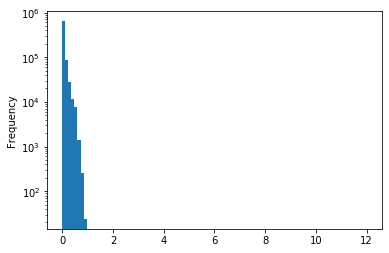

In [46]:
(pre_app['AMT_DOWN_PAYMENT']/pre_app['AMT_APPLICATION']).plot.hist(bins=100,range=(0,12),log=True) 
#除以申請額反而皆小於1，合理推測 AMT_APPLICATION 與 AMT_CREDIT 的說明文字應該相反

In [47]:
(pre_app['AMT_DOWN_PAYMENT']/pre_app['AMT_APPLICATION']).describe()
#除以申請額反而皆小於1，合理推測 AMT_APPLICATION 與 AMT_CREDIT 的說明文字應該相反

count    774345.000000
mean          0.076523
std           0.102556
min          -0.000014
25%           0.000000
50%           0.050429
75%           0.100082
max           0.918197
dtype: float64

In [48]:
pre_app.loc[pre_app['Down_Payment%'] == 0].head(10) # 為什麼頭期款為0，是否也是NA的意思

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CREDIT/APPLICATION,GOODS_PRICE/APPLICATION,Down_Payment%
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,1.000000,1.0,0.0
13,1397919,321676,Consumer loans,7654.860,53779.5,57564.0,0.0,53779.5,SUNDAY,15,...,POS household without interest,365243.0,-378.0,-168.0,-168.0,-163.0,1.0,1.070371,1.0,0.0
14,2273188,270658,Consumer loans,9644.220,26550.0,27252.0,0.0,26550.0,SATURDAY,10,...,POS household with interest,365243.0,-693.0,-633.0,-633.0,-627.0,0.0,1.026441,1.0,0.0
27,1676258,433469,Cash loans,22242.825,247500.0,268083.0,0.0,247500.0,THURSDAY,14,...,Cash X-Sell: high,365243.0,-1853.0,-1343.0,-1343.0,-1334.0,1.0,1.083164,1.0,0.0
30,2138466,170289,Consumer loans,3286.485,32562.0,32562.0,0.0,32562.0,FRIDAY,12,...,POS mobile with interest,365243.0,-273.0,57.0,-183.0,-179.0,0.0,1.000000,1.0,0.0
31,2191093,182450,Consumer loans,9789.255,100485.0,100485.0,0.0,100485.0,WEDNESDAY,9,...,POS household with interest,365243.0,-360.0,-30.0,-270.0,-261.0,0.0,1.000000,1.0,0.0
35,2027074,208000,Consumer loans,12065.535,56655.0,66411.0,0.0,56655.0,SATURDAY,7,...,POS household with interest,365243.0,-645.0,-495.0,-495.0,-493.0,0.0,1.172200,1.0,0.0
36,2766278,178375,Consumer loans,7511.085,32490.0,38380.5,0.0,32490.0,MONDAY,5,...,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN,1.181302,1.0,0.0
38,1692577,125157,Consumer loans,9946.485,99319.5,109809.0,0.0,99319.5,SATURDAY,9,...,POS household without interest,365243.0,-362.0,-32.0,-242.0,-237.0,1.0,1.105614,1.0,0.0
40,2317570,258076,Consumer loans,4539.285,18360.0,21834.0,0.0,18360.0,WEDNESDAY,10,...,POS mobile with interest,365243.0,-764.0,-614.0,-614.0,-609.0,0.0,1.189216,1.0,0.0


In [49]:
pre_app.loc[pre_app['Down_Payment%'] == 0].shape[0]

369854

In [50]:
pre_app.loc[pre_app['FLAG_LAST_APPL_PER_CONTRACT']=='N']

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CREDIT/APPLICATION,GOODS_PRICE/APPLICATION,Down_Payment%
277,2770539,185661,Revolving loans,6750.0,0.0,180000.0,NaN,NaN,THURSDAY,11,...,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,2139354,388401,Revolving loans,29250.0,0.0,585000.0,NaN,NaN,THURSDAY,15,...,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,2470545,148658,Revolving loans,7875.0,0.0,157500.0,NaN,NaN,FRIDAY,9,...,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,2319125,218182,Revolving loans,22500.0,337500.0,900000.0,NaN,337500.0,TUESDAY,12,...,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,2.666667,1.0,NaN
503,2195939,340546,Revolving loans,9000.0,0.0,67500.0,NaN,NaN,SUNDAY,13,...,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668202,1790442,404498,Revolving loans,9000.0,0.0,180000.0,NaN,NaN,SATURDAY,8,...,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1668506,1341321,152116,Revolving loans,7875.0,0.0,180000.0,NaN,NaN,THURSDAY,10,...,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1668507,2468578,343076,Revolving loans,6750.0,0.0,157500.0,NaN,NaN,WEDNESDAY,13,...,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669593,2063794,225535,Revolving loans,38250.0,0.0,315000.0,NaN,NaN,WEDNESDAY,9,...,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
pre_app.loc[pre_app['SK_ID_CURR']==388401].iloc[:,0:20] 
# 看看 FLAG_LAST_APPL_PER_CONTRACT == 'N' 跟其他比貸款比起來有什麼差異
# 其他欄位整理出的資訊應該可排除 FLAG_LAST_APPL_PER_CONTRACT == 'N' 的資料列

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON
366,2139354,388401,Revolving loans,29250.000,0.0,585000.0,NaN,NaN,THURSDAY,15,N,1,NaN,NaN,NaN,XAP,Refused,-608,XNA,HC
21484,1351764,388401,Cash loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,9,Y,1,NaN,NaN,NaN,XNA,Refused,-293,XNA,HC
237382,1347262,388401,Cash loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,9,Y,1,NaN,NaN,NaN,XNA,Refused,-293,XNA,HC
351729,2117647,388401,Revolving loans,29250.000,0.0,765000.0,NaN,NaN,THURSDAY,15,N,0,NaN,NaN,NaN,XAP,Refused,-608,XNA,HC
411525,1343347,388401,Cash loans,51334.695,810000.0,893398.5,NaN,810000.0,THURSDAY,15,Y,1,NaN,NaN,NaN,XNA,Refused,-608,XNA,HC
458977,1601845,388401,Cash loans,51334.695,810000.0,893398.5,NaN,810000.0,WEDNESDAY,10,Y,1,NaN,NaN,NaN,XNA,Refused,-602,XNA,HC
588986,1146820,388401,Consumer loans,25646.355,134955.0,135774.0,13495.5,134955.0,SATURDAY,12,Y,1,0.098465,NaN,NaN,XAP,Approved,-648,XNA,XAP
1025848,2360417,388401,Consumer loans,3682.350,44955.0,29623.5,18000.0,44955.0,FRIDAY,17,Y,1,0.411638,NaN,NaN,XAP,Approved,-1643,Cash through the bank,XAP
1418444,1232518,388401,Consumer loans,8043.165,68355.0,38799.0,31500.0,68355.0,SUNDAY,16,Y,1,0.488006,NaN,NaN,XAP,Approved,-920,Cash through the bank,XAP
1428084,2163887,388401,Revolving loans,29250.000,0.0,765000.0,NaN,NaN,THURSDAY,15,N,0,NaN,NaN,NaN,XAP,Refused,-608,XNA,HC


In [52]:
pre_app.loc[pre_app['NFLAG_LAST_APPL_IN_DAY']==0]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,CREDIT/APPLICATION,GOODS_PRICE/APPLICATION,Down_Payment%
207,1033218,191478,Consumer loans,7300.530,39465.0,35505.0,3960.0,39465.0,WEDNESDAY,7,...,POS mobile with interest,365243.0,-686.0,-536.0,-566.0,-551.0,0.0,0.899658,1.0,0.111534
277,2770539,185661,Revolving loans,6750.000,0.0,180000.0,NaN,NaN,THURSDAY,11,...,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,2319125,218182,Revolving loans,22500.000,337500.0,900000.0,NaN,337500.0,TUESDAY,12,...,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,2.666667,1.0,NaN
1279,2629070,206111,Cash loans,28316.115,495000.0,553806.0,NaN,495000.0,WEDNESDAY,11,...,Cash X-Sell: middle,365243.0,-732.0,318.0,-372.0,-366.0,1.0,1.118800,1.0,NaN
1335,2187571,379247,Revolving loans,4500.000,0.0,135000.0,NaN,NaN,SATURDAY,17,...,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668046,1762724,325916,Revolving loans,22500.000,540000.0,540000.0,NaN,540000.0,SATURDAY,12,...,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.0,NaN
1668506,1341321,152116,Revolving loans,7875.000,0.0,180000.0,NaN,NaN,THURSDAY,10,...,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1668507,2468578,343076,Revolving loans,6750.000,0.0,157500.0,NaN,NaN,WEDNESDAY,13,...,Card Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669593,2063794,225535,Revolving loans,38250.000,0.0,315000.0,NaN,NaN,WEDNESDAY,9,...,Card X-Sell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
pre_app.loc[pre_app['SK_ID_CURR']==218182].iloc[:,1:20] 

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON
482,218182,Revolving loans,22500.000,337500.0,900000.0,NaN,337500.0,TUESDAY,12,N,0,NaN,NaN,NaN,XAP,Refused,-667,XNA,HC
81845,218182,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,12,Y,1,NaN,NaN,NaN,XNA,Canceled,-367,XNA,XAP
128414,218182,Revolving loans,22500.000,337500.0,675000.0,NaN,337500.0,TUESDAY,12,N,0,NaN,NaN,NaN,XAP,Refused,-667,XNA,HC
263349,218182,Revolving loans,22500.000,337500.0,450000.0,NaN,337500.0,TUESDAY,12,N,1,NaN,NaN,NaN,XAP,Refused,-667,XNA,HC
653039,218182,Cash loans,24317.010,463500.0,536917.5,NaN,463500.0,MONDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-367,Cash through the bank,XAP
725893,218182,Cash loans,9842.400,90000.0,90000.0,0.0,90000.0,THURSDAY,11,Y,1,0.0,NaN,NaN,XNA,Approved,-2457,Cash through the bank,XAP
904853,218182,Cash loans,36853.650,908296.2,1040182.2,NaN,908296.2,SATURDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1013,Cash through the bank,XAP
1326060,218182,Cash loans,14892.300,225000.0,254700.0,NaN,225000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1282,Cash through the bank,XAP
1355571,218182,Cash loans,47303.325,900000.0,991476.0,NaN,900000.0,TUESDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-667,Cash through the bank,XAP
1385115,218182,Cash loans,16978.905,180000.0,197820.0,0.0,180000.0,WEDNESDAY,9,Y,1,0.0,NaN,NaN,Everyday expenses,Approved,-2100,Cash through the bank,XAP


In [54]:
pre_app.loc[(pre_app['RATE_DOWN_PAYMENT']!=0) & (pre_app['RATE_DOWN_PAYMENT'].isna()==False)].iloc[:,1:20] 

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON
15,151612,Consumer loans,21307.455,126490.5,119853.0,12649.5,126490.5,TUESDAY,7,Y,1,0.103971,NaN,NaN,XAP,Approved,-699,Cash through the bank,XAP
16,154602,Consumer loans,4187.340,26955.0,27297.0,1350.0,26955.0,SATURDAY,12,Y,1,0.051324,NaN,NaN,XAP,Approved,-1473,Cash through the bank,XAP
28,418383,Consumer loans,7656.705,74610.0,65610.0,9000.0,74610.0,MONDAY,14,Y,1,0.131374,NaN,NaN,XAP,Approved,-2702,Cash through the bank,XAP
37,161591,Consumer loans,39111.075,214380.0,209497.5,13500.0,214380.0,FRIDAY,12,Y,1,0.065932,NaN,NaN,XAP,Approved,-989,Cash through the bank,XAP
39,281589,Consumer loans,6752.250,35955.0,33115.5,4500.0,35955.0,THURSDAY,9,Y,1,0.130290,NaN,NaN,XAP,Approved,-983,Cash through the bank,XAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670195,334654,Consumer loans,24851.025,248535.0,223681.5,24853.5,248535.0,FRIDAY,17,Y,1,0.108909,NaN,NaN,XAP,Approved,-1389,Cash through the bank,XAP
1670198,212968,Consumer loans,2088.495,22869.0,20578.5,2290.5,22869.0,SUNDAY,16,Y,1,0.109081,NaN,NaN,XAP,Approved,-715,Cash through the bank,XAP
1670201,442706,Consumer loans,6127.065,45450.0,54126.0,2295.0,45450.0,MONDAY,10,Y,1,0.044300,NaN,NaN,XAP,Approved,-1728,Cash through the bank,XAP
1670210,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP


In [55]:
(pre_app['RATE_DOWN_PAYMENT'] - (pre_app['AMT_DOWN_PAYMENT']/pre_app['AMT_APPLICATION'])).describe()

count    774345.000000
mean          0.003116
std           0.007542
min          -0.296298
25%           0.000000
50%           0.000000
75%           0.004824
max           0.081803
dtype: float64

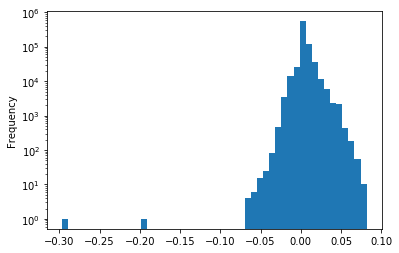

In [56]:
(pre_app['RATE_DOWN_PAYMENT'] - (pre_app['AMT_DOWN_PAYMENT']/pre_app['AMT_APPLICATION'])).plot.hist(bins=50,log=True)
# 頭期款利率與頭期款金額的差異可能有意義

C:\Users\YEN32\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\YEN32\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.14455150e-02, 0.00000000e+00, 0.00000000e+00, 7.07701995e-01,
        2.14455150e-02, 0.00000000e+00, 0.00000000e+00, 1.07227575e-02,
        4.93246845e-01, 0.00000000e+00, 1.07227575e-02, 1.07227575e-02,
        1.36179020e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.12160043e+01, 7.50593025e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.12160043e+01, 5.36137875e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.17950332e-01, 4.28910300e-02,
        1.07227575e-02, 1.88398849e+01, 9.60759071e+00, 9.98288723e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.07227575e-02]),
 array([0.37315011, 0.38882135, 0.4044926 , 0.42016385, 0.4358351 ,
        0.45150634, 0.46717759, 0.48284884, 0.49852008, 0.51419133,
        0.52986258, 0.54553383, 0.56120507, 0.57687632, 0.59254757,
        0.60821882, 0.62389006, 0.63956131, 0.65523256, 0.67090381,
      

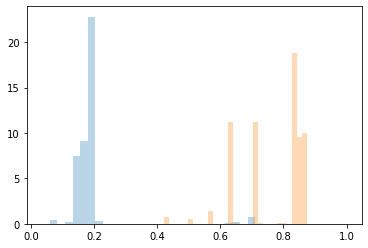

In [57]:
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40) # 主要利率與優惠利率不知道有何意義
plt.hist(pre_app['RATE_INTEREST_PRIMARY'],**kwargs)
plt.hist(pre_app['RATE_INTEREST_PRIVILEGED'],**kwargs)

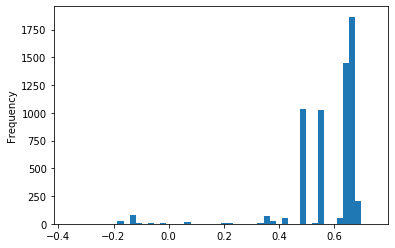

In [58]:
(pre_app['RATE_INTEREST_PRIVILEGED']-pre_app['RATE_INTEREST_PRIMARY']).plot.hist(bins=50) # 主要利率與優惠利率的差距有用嗎

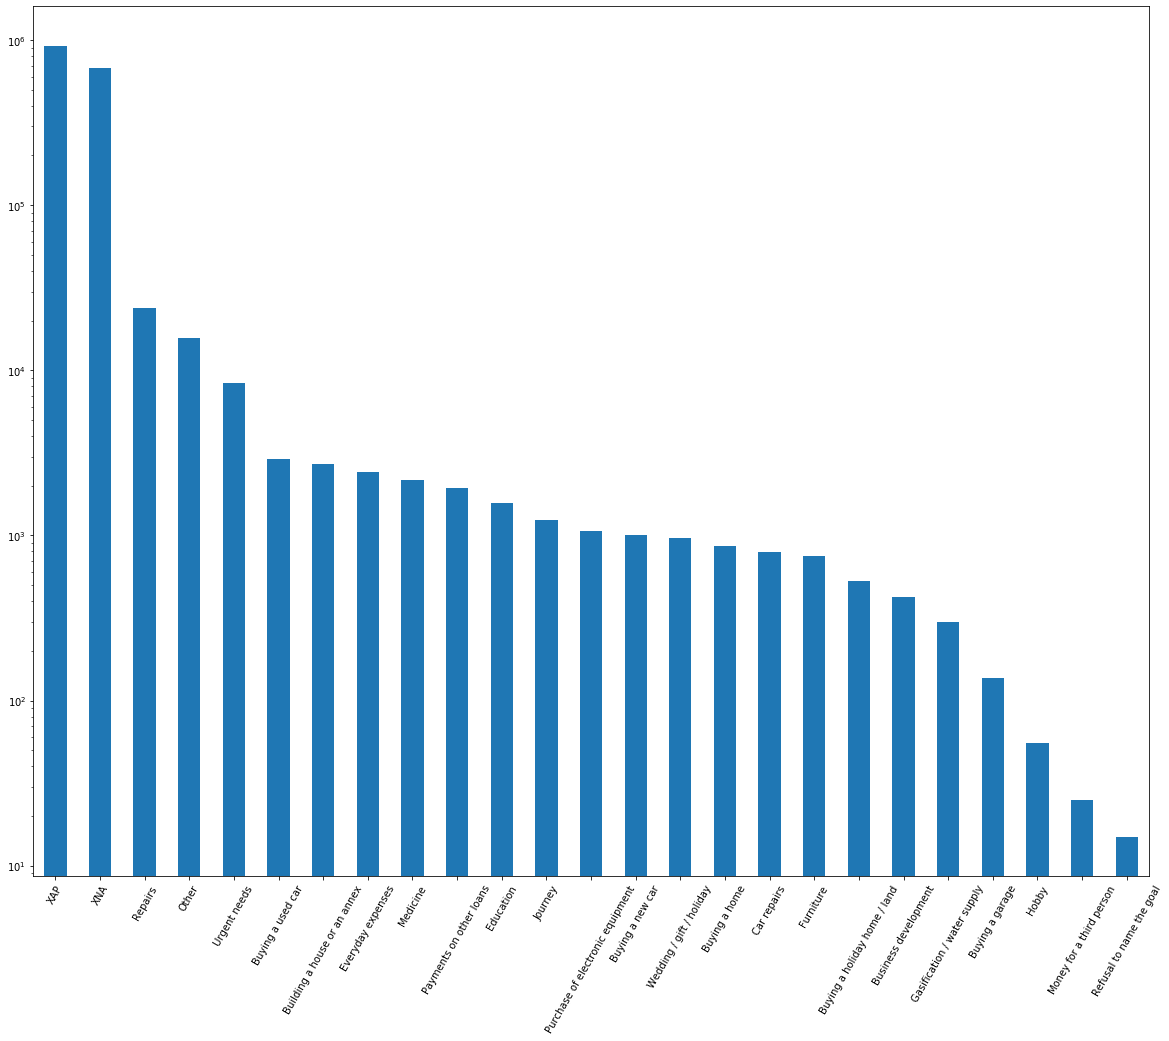

In [59]:
plt.figure(figsize=(20,16))
pre_app['NAME_CASH_LOAN_PURPOSE'].value_counts().plot(kind='bar',rot=60,logy=True) # 是否可連結其他表，看各項用途的還款狀況

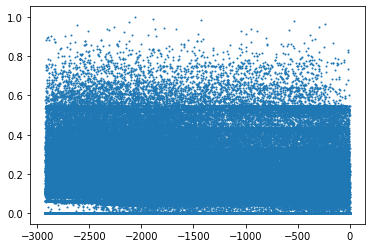

In [60]:
plt.scatter(x=pre_app['DAYS_DECISION'],y=pre_app['RATE_DOWN_PAYMENT'],s=1) 
# Kaggle中的"Some small findings from a part of 2nd place solution"有畫利率與時間的關係，不知怎麼畫的
# https://www.kaggle.com/c/home-credit-default-risk/discussion/64784

In [61]:
timeBin = np.linspace(pre_app['DAYS_DECISION'].min(),pre_app['DAYS_DECISION'].max(),num=30)
timeBin

array([-2.92200000e+03, -2.82127586e+03, -2.72055172e+03, -2.61982759e+03,
       -2.51910345e+03, -2.41837931e+03, -2.31765517e+03, -2.21693103e+03,
       -2.11620690e+03, -2.01548276e+03, -1.91475862e+03, -1.81403448e+03,
       -1.71331034e+03, -1.61258621e+03, -1.51186207e+03, -1.41113793e+03,
       -1.31041379e+03, -1.20968966e+03, -1.10896552e+03, -1.00824138e+03,
       -9.07517241e+02, -8.06793103e+02, -7.06068966e+02, -6.05344828e+02,
       -5.04620690e+02, -4.03896552e+02, -3.03172414e+02, -2.02448276e+02,
       -1.01724138e+02, -1.00000000e+00])

In [ ]:
for i in pre_app['DAYS_DECISION']:
    for m in range(28):
        if (i >= timeBin[m]) & (i < timeBin[m+1]):
            pre_app['timeBin'] = timeBin[m+1]-timeBin[m]
            break
#         else:
#             continue
# 這樣寫似乎不對

In [354]:
def timebinCol(x):
    for m in range(28):
        if (x >= timeBin[m]) & (x < timeBin[m+1]):
            pre_app['timeBin'] = timeBin[m+1]-timeBin[m]
            break

In [355]:
# pre_app['DAYS_DECISION'].apply(lambda x: timebinCol(x))

KeyboardInterrupt: 

pre_app.loc[pre_app['DAYS_DECISION'],pre_app['timeBin']].head(10)

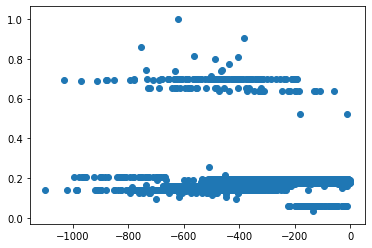

In [338]:
plt.scatter(x=pre_app['DAYS_DECISION'],y=pre_app['RATE_INTEREST_PRIMARY'])

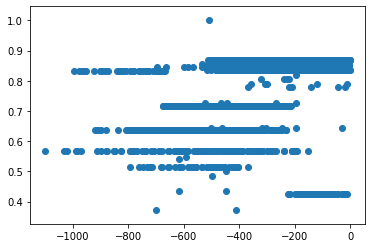

In [339]:
plt.scatter(x=pre_app['DAYS_DECISION'],y=pre_app['RATE_INTEREST_PRIVILEGED'])